# 04 - Feature Selection / Dimensionality Reduction

In [1]:
# All import insertions
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import VarianceThreshold

In [2]:
#Open files
df = pd.read_csv("../data/processed/data_bivariate.csv", low_memory=False,index_col=0)

In [3]:
df.drop(['PlayId'], axis=1, inplace=True)

In [4]:
df.shape

(28511, 35)

In [5]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
isHomeTeam,28511.0,0.504051,0.499992,0.00,0.000,1.00,1.00,1.00,0.249992,-0.016206,-1.999878
X,28511.0,60.123478,26.207946,5.25,37.515,60.28,82.85,115.10,686.856427,-0.014068,-1.125885
Y,28511.0,26.827715,3.443716,9.35,24.090,26.84,29.55,44.74,11.859183,0.010594,-0.541048
S,28511.0,4.269283,1.043093,0.00,3.610,4.27,4.96,8.47,1.088043,-0.150453,0.406837
A,28511.0,2.646704,0.930003,0.00,2.060,2.64,3.21,14.71,0.864906,0.610211,3.837740
Orientation,28511.0,180.388089,102.543336,0.00,90.000,181.47,270.34,360.00,10515.135699,-0.018548,-1.237173
Dir,28511.0,179.955335,101.068075,0.02,91.540,184.40,272.80,359.92,10214.755720,-0.016030,-1.320505
Season,28511.0,2017.866297,0.787893,2017.00,2017.000,2018.00,2019.00,2019.00,0.620776,0.240622,-1.352983
Quarter,28511.0,2.500368,1.127628,1.00,1.000,3.00,4.00,4.00,1.271545,-0.007815,-1.381769
Down,28511.0,1.510049,0.669862,1.00,1.000,1.00,2.00,4.00,0.448715,1.120095,0.693333


In [6]:
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

## Variance Threshhold
In Variance Threshold, the function looks at the columns variance, and eliminates the columns that don't meet the threshold.

In [7]:
thresh = 0.5
selector = VarianceThreshold(threshold=.5)
vt = selector.fit_transform(X)[0:5]

In [8]:
idx = np.where(selector.variances_ > thresh)[0]
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 17, 18, 19, 20, 21,
       22, 25, 26, 27, 28], dtype=int64)

In [9]:
# All the columns prior to Variance Threshold
X.columns

Index(['isHomeTeam', 'X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season',
       'Quarter', 'Down', 'Distance', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'IsPossTeamInLead', 'DefendersInTheBox',
       'isPlayDirectionLeft', 'TimeSnapDiff', 'YardsToTouchdown',
       'PlayerHeightInches', 'PlayerWeight', 'Age', 'Week', 'StadiumTypeCode',
       'TurfCode', 'Centers', 'Cornerbacks', 'DefensiveEnds',
       'DefensiveTackles', 'LineBackers', 'NoseTackles', 'OffensiveGuards',
       'Safeties', 'TightEnds', 'DistanceBins'],
      dtype='object')

In [10]:
# All the columns prior to Variance Threshold All the columns after the Threshold
X.loc[:, selector.get_support()].columns

Index(['X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'Season', 'Quarter',
       'Distance', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'DefendersInTheBox', 'YardsToTouchdown', 'PlayerHeightInches',
       'PlayerWeight', 'Age', 'Week', 'StadiumTypeCode', 'Cornerbacks',
       'DefensiveEnds', 'DefensiveTackles', 'LineBackers'],
      dtype='object')

In [11]:
# All the columns the Variance Threshold is removing
VarElim = (X.columns.difference(X.loc[:, selector.get_support()].columns)).tolist()
print(VarElim)


['Centers', 'DistanceBins', 'Down', 'IsPossTeamInLead', 'NoseTackles', 'OffensiveGuards', 'Safeties', 'TightEnds', 'TimeSnapDiff', 'TurfCode', 'isHomeTeam', 'isPlayDirectionLeft']


## Backward Elimination

In [12]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values()

Distance                  1.766921e-195
A                          3.999666e-87
S                          1.076648e-26
DistanceBins               3.917672e-14
Down                       5.799341e-12
YardsToTouchdown           7.209538e-09
DefendersInTheBox          9.607658e-06
const                      6.981927e-04
Age                        9.783090e-04
Season                     1.005296e-03
OffensiveGuards            2.687514e-03
StadiumTypeCode            6.367971e-02
TightEnds                  1.073329e-01
HomeScoreBeforePlay        1.980793e-01
IsPossTeamInLead           2.542123e-01
isHomeTeam                 3.053024e-01
TimeSnapDiff               3.267196e-01
NoseTackles                4.472451e-01
Y                          4.492755e-01
PlayerHeightInches         4.503462e-01
Centers                    4.759128e-01
isPlayDirectionLeft        5.602609e-01
Week                       5.965825e-01
DefensiveTackles           5.980046e-01
PlayerWeight               6.594991e-01


In [13]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['S', 'A', 'Season', 'Down', 'Distance', 'DefendersInTheBox', 'YardsToTouchdown', 'Age', 'OffensiveGuards', 'TightEnds', 'DistanceBins']


## RFE (Recursive Feature Elimination)

In [14]:
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True False False False False  True  True False
 False False  True False False False False False False False False False
 False False False False False  True False False False  True]
[14 26 21  1  1 28 27  6 15  1  1 22 25 13  1  8 10 20 18 24 16 23 11 17
 12 19  5  2  4  1  7  3  9  1]


In [15]:
#no of features
nof_list=np.arange(1,13)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.207071


In [16]:
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['S', 'A', 'Down', 'Distance', 'DefendersInTheBox', 'NoseTackles',
       'DistanceBins'],
      dtype='object')


## Embedded Method

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000953
Best score using built-in LassoCV: 0.209279


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 26 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

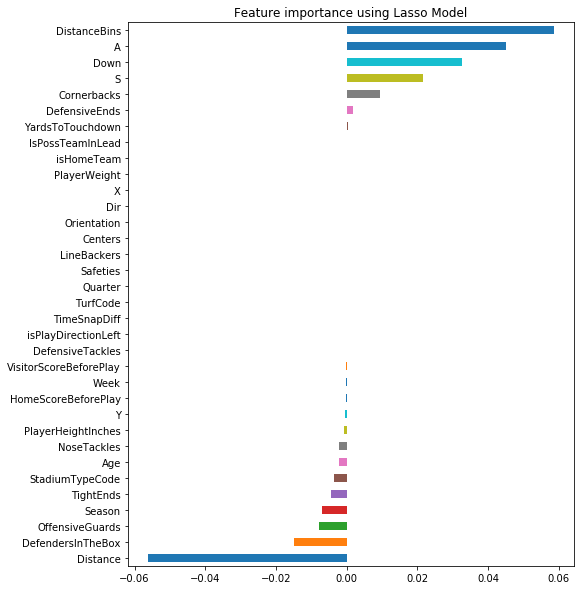

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [20]:
#imp_coef.where((imp_coef == 0)).notna()
sfEmbed = (imp_coef[imp_coef == 0].keys()).tolist()
print(sfEmbed)

['DefensiveTackles', 'isPlayDirectionLeft', 'TimeSnapDiff', 'TurfCode', 'Quarter', 'Safeties', 'LineBackers', 'Centers']


## Principal Component Analysis

In [21]:
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

In [22]:
# Splitting data set into train and test
from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=72)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [24]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print (np.count_nonzero(explained_variance))

[7.94129657e-02 6.97114578e-02 6.46521625e-02 6.27996669e-02
 5.33999277e-02 5.08724228e-02 4.79436292e-02 4.46925437e-02
 4.07195030e-02 3.54212723e-02 3.31214156e-02 3.24421484e-02
 3.09102031e-02 2.98310691e-02 2.92985441e-02 2.73473958e-02
 2.67997442e-02 2.65255482e-02 2.57040248e-02 2.47182433e-02
 2.08485846e-02 1.90001959e-02 1.82199367e-02 1.70039053e-02
 1.68987489e-02 1.58410757e-02 1.48176492e-02 1.17482565e-02
 1.01477642e-02 7.20920508e-03 6.81450027e-03 3.56979873e-03
 1.47585799e-03 8.06327263e-05]
34


In [26]:
for i in range(0,np.count_nonzero(explained_variance + 1)):
    print(i," ", sum(explained_variance[0:i]))

0   0
1   0.07941296569747643
2   0.14912442351353444
3   0.21377658597149046
4   0.2765762528970078
5   0.32997618057288347
6   0.38084860336705395
7   0.42879223258714994
8   0.4734847763366245
9   0.5142042792950245
10   0.5496255515724163
11   0.5827469672132466
12   0.6151891155900213
13   0.646099318723369
14   0.6759303877840832
15   0.7052289319267596
16   0.7325763276991107
17   0.7593760719076019
18   0.7859016201465038
19   0.8116056449804234
20   0.8363238882643104
21   0.8571724728595272
22   0.8761726687383357
23   0.8943926053950996
24   0.9113965107063879
25   0.9282952596091165
26   0.9441363353125076
27   0.9589539844775077
28   0.9707022409752881
29   0.9808500052044549
30   0.9880592102886561
31   0.9948737105569134
32   0.9984435092854158
33   0.9999193672736799


## Linear Discriminant Analysis

In [27]:
X = df.drop("isFirstDown",1)   #Feature Matrix
y = df["isFirstDown"]          #Target Variable

In [28]:
# Splitting data set into train and test
from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=72)


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [30]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 15)
X_train =lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [31]:
X_train

array([[-0.24160133],
       [ 1.15641377],
       [-0.39498388],
       ...,
       [ 0.23060777],
       [-0.48894889],
       [-0.01988155]])

In [32]:
df.shape

(28511, 35)

In [33]:
df.to_csv("../data/processed/data_allcolumns.csv")

## Final attribute drops

In [34]:
# Removing all columns suggested, bringing the number of attributes to 12
# df.drop(['A', 'Age', 'Centers', 'Cornerbacks', 'DefendersInTheBox', 'Distance', 'DistanceBins', 'Down', \
#          'isHomeTeam', 'isPlayDirectionLeft', 'IsPossTeamInLead', 'LineBackers', 'NoseTackles', \
#          'OffensiveGuards', 'Quarter', 'S', 'Safeties', 'Season', 'StadiumTypeCode', 'TightEnds', 'TimeSnapDiff', \
#          'TurfCode', 'YardsToTouchdown'], axis=1, inplace=True)

In [35]:
# Removing based only on low variance
# df.drop(VarElim, axis=1, inplace=True)

# Removing based only on backwards elimination
# df.drop(selected_features_BE, axis=1, inplace=True)

# Removing based only on recursive feature extraction
# df.drop(selected_features_rfe, axis=1, inplace=True)

# Removing based only on Embed Method
# df.drop(sfEmbed, axis=1, inplace=True)

# Removing based on low variance and Embedded method
toRemove = VarElim + list(set(sfEmbed) - set(VarElim))
df.drop(toRemove, axis=1, inplace=True)


In [36]:
df.shape

(28511, 20)

In [37]:
df.to_csv("../data/processed/data_ready.csv")